     
q_0: 
     
q_1: 
     
c: 2/
     


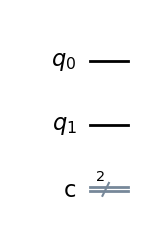

In [46]:
# Activity 1
from qiskit import QuantumCircuit

basic_two_qubit_circuit = QuantumCircuit(2, 2)

print(basic_two_qubit_circuit.draw())
basic_two_qubit_circuit.draw("mpl")


                             
    quantum_register_main_0: 
                             
    quantum_register_main_1: 
                             
   quantum_register_ancilla: 
                             
classical_register_result: 1/
                             


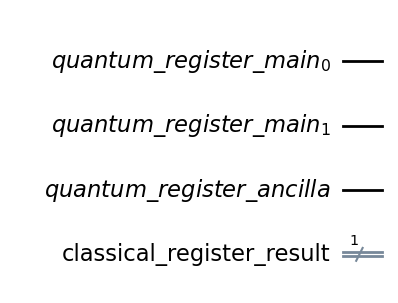

In [47]:
# Activity 2
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

quantum_register_main = QuantumRegister(2, "quantum_register_main")
quantum_register_ancilla = QuantumRegister(1, "quantum_register_ancilla")
classical_register_result  = ClassicalRegister(1, "classical_register_result")

combined_quantum_circuit = QuantumCircuit(quantum_register_main, quantum_register_ancilla, classical_register_result)

print(combined_quantum_circuit.draw())
combined_quantum_circuit.draw("mpl")

     ┌───┐┌─────────┐┌───┐     
q_0: ┤ Z ├┤ Ry(π/2) ├┤ H ├──■──
     ├───┤└────┬────┘└───┘┌─┴─┐
q_1: ┤ Y ├─────■──────────┤ X ├
     └───┘                └───┘
c: 2/══════════════════════════
                               


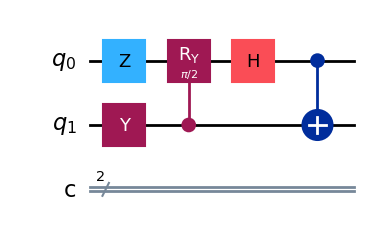

In [48]:
# Activity 3
from qiskit import QuantumCircuit
import numpy as np

activity3_circuit = QuantumCircuit(2, 2)
activity3_circuit.z(0)
activity3_circuit.y(1)
activity3_circuit.cry(np.pi / 2, 1, 0)
activity3_circuit.h(0)
activity3_circuit.cx(0, 1)

print(activity3_circuit.draw())
activity3_circuit.draw("mpl")


     ┌───┐┌─────────┐┌───┐     ┌─┐   
q_0: ┤ Z ├┤ Ry(π/2) ├┤ H ├──■──┤M├───
     ├───┤└────┬────┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ┤ Y ├─────■──────────┤ X ├─╫─┤M├
     └───┘                └───┘ ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 


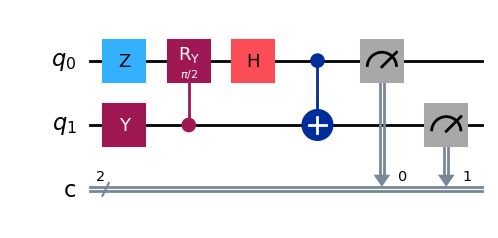

In [49]:
# Activity 4
activity3_circuit.measure([0, 1], [0, 1])

print(activity3_circuit.draw())
activity3_circuit.draw("mpl")


In [50]:
# Activity 5
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)

print("Circuit:")
print(qc.draw())

state = Statevector.from_instruction(qc)

print("\nStatevector:")
print(state.data)

# Départ : |00>.
# X sur le qubit 1 → |10>.
# H sur le qubit 0 → (|10> + |11>) / √2.
# Dans l’ordre des bases utilisé par Qiskit (|00>, |01>, |10>, |11>), le vecteur final doit donc être [0, 0, 1/√2, 1/√2].
# Le simulateur donne exactement la même chose.

Circuit:
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 2/═════
          

Statevector:
[0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]


In [51]:
# Activity 6
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)

print("Circuit:")
print(qc.draw())

U = Operator(qc).data
print("\nMatrix:")
print(U)

# Le circuit fait X sur le qubit 1 puis H sur le qubit 0.
# Donc la matrice globale = (H ⊗ I) · (I ⊗ X).
# Le simulateur donne bien cette matrice, donc c'est correct.

Circuit:
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 2/═════
          

Matrix:
[[ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]


     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


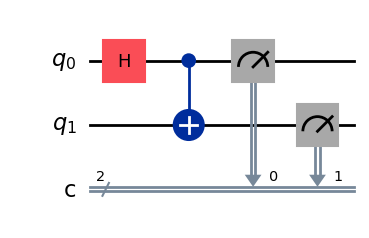

In [52]:
# Activity 7
from qiskit import QuantumCircuit

activity7_circuit = QuantumCircuit(2, 2)
activity7_circuit.h(0)
activity7_circuit.cx(0, 1)
activity7_circuit.measure([0, 1], [0, 1])

print(activity7_circuit.draw())
activity7_circuit.draw("mpl")

# État initial : |00>
# H sur qubit 0 : (|00> + |01>) / √2
# CNOT (contrôle = qubit 0, cible = qubit 1) :
#   |00> -> |00>
#   |01> -> |11>
# État final : (|00> + |11>) / √2
#   P(00) = 1/2, P(11) = 1/2, P(01) = P(10) = 0
#
# Si on mesure seulement le premier qubit :
#   P(q0 = 0) = 1/2, P(q0 = 1) = 1/2

In [53]:
# Activity 7'
from qiskit.quantum_info import Statevector

activity7_state = QuantumCircuit(2)
activity7_state.h(0)
activity7_state.cx(0, 1)

state = Statevector.from_instruction(activity7_state)

prob_joint = state.probabilities_dict()
print(f"The theoretical probability distribution is: {prob_joint}")

prob_first = state.probabilities_dict(qargs=[0])
print(f"The theoretical probability distribution is: {prob_first}")


The theoretical probability distribution is: {np.str_('00'): np.float64(0.4999999999999999), np.str_('11'): np.float64(0.4999999999999999)}
The theoretical probability distribution is: {np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}


Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Counts (512 runs) : {'11': 265, '00': 247}


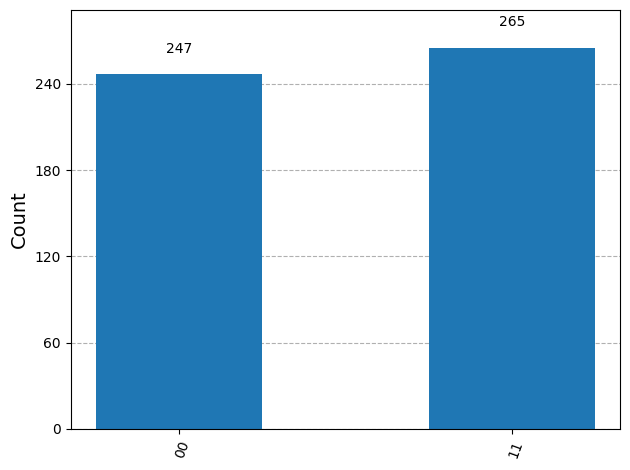

In [54]:
# Activity 8
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

activity7_circuit = QuantumCircuit(2, 2)
activity7_circuit.h(0)
activity7_circuit.cx(0, 1)
activity7_circuit.measure([0, 1], [0, 1])

print("Circuit:")
print(activity7_circuit.draw())

sampler = StatevectorSampler()
result = sampler.run([activity7_circuit], shots=512).result()
data = result[0].data

counts = data.c.get_counts()
print("Counts (512 runs) :", counts)

plot_histogram(counts)

# L’état final est (|00> + |11>) / √2, donc P(00) = 1/2 et P(11) = 1/2
# Avec 512 runs, on s’attend à environ la moitié de 00 et à la moitié de 11 avec des petites variations.
# Selon moi, oui, 512 runs suffisent pour voir le 50/50 mais pour une estimation très précise il faudrait beaucoup plus de runs.


In [55]:
# Activity 9
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum_platform", token="caw0JiIFPqWYYGlyIuQWniJx6kNjbrGYkMsALT1cqD_o")

qpus = service.backends(operational=True, simulator=False)
print("Available free QPUs :")
print(qpus)

least_busy_qpu = service.least_busy(operational=True, simulator=False)
print("\nLeast busy QPU :")
print(least_busy_qpu.name)

print("\nNumber of qubits of the least-busy device :")
print(least_busy_qpu.configuration().n_qubits)

# Resulats :
# Least busy QPU :
# ibm_fez

# Number of qubits of the least-busy device :
# 156

qiskit_runtime_service._discover_account:WARNING:2025-12-09 22:49:30,323: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2025-12-09 22:49:32,471: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-12-09 22:49:32,474: Loading instance: open-instance, plan: open


Available free QPUs :
[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_marrakesh')>, <IBMBackend('ibm_torino')>]


qiskit_runtime_service.backends:WARNING:2025-12-09 22:49:34,780: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-09 22:49:35,862: Using instance: open-instance, plan: open



Least busy QPU :
ibm_fez

Number of qubits of the least-busy device :
156


qiskit_runtime_service._discover_account:WARNING:2025-12-09 22:49:35,875: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2025-12-09 22:49:37,560: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-12-09 22:49:38,302: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-09 22:49:40,648: Using instance: open-instance, plan: open


Least busy QPU : ibm_fez
Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Transpiled circuit for ibm_fez :
global phase: 3π/4
          ┌─────────┐┌────┐ ┌───────┐    ┌────┐┌─────────┐┌─┐
q_1 -> 21 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├──■─┤ √X ├┤ Rz(π/2) ├┤M├
          ├─────────┤├────┤┌┴───────┴┐ │ └┬─┬─┘└─────────┘└╥┘
q_0 -> 22 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■──┤M├──────────────╫─
          └─────────┘└────┘└─────────┘    └╥┘              ║ 
     c: 2/═════════════════════════════════╩═══════════════╩═
                                           0               1 
Counts on the real QPU : {'00': 4012, '01': 186, '11': 3784, '10': 210}


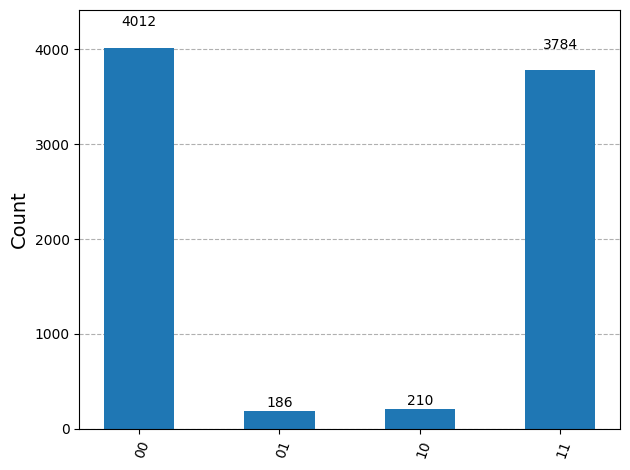

In [ ]:
# Activity 10
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

service = QiskitRuntimeService(channel="ibm_quantum_platform", token="caw0JiIFPqWYYGlyIuQWniJx6kNjbrGYkMsALT1cqD_o")

qpu = service.least_busy(operational=True, simulator=False)
print("Least busy QPU :", qpu.name)

activity7_circuit = QuantumCircuit(2, 2)
activity7_circuit.h(0)
activity7_circuit.cx(0, 1)
activity7_circuit.measure([0, 1], [0, 1])

print("Circuit:")
print(activity7_circuit.draw())

activity10_transpiled = transpile(activity7_circuit, qpu)
print("Transpiled circuit for", qpu.name, ":")
print(activity10_transpiled.draw())

sampler = Sampler(mode=qpu)
job = sampler.run([activity10_transpiled], shots=8192)
result = job.result()
data = result[0].data

counts = data.c.get_counts()
print("Counts on the real QPU :", counts)

plot_histogram(counts)

# Théoriquement, le circuit prépare l’état (|00> + |11>) / √2,
# donc dans la base (|00>, |01>, |10>, |11>) on s’attend à :
#   P(00) = 1/2, P(11) = 1/2, P(01) = P(10) = 0.
#
# Sur le vrai QPU, j’obtiens :
#   00 : 4012 / 8192 ≈ 49,0 %
#   11 : 3784 / 8192 ≈ 46,2 %
#   01 : 186 / 8192 ≈ 2,3 %
#   10 : 210 / 8192 ≈ 2,6 %
#
# Donc 00 et 11 restent majoritaires, ce qui est cohérent avec la théorie, mais on voit aussi un peu de 01 et 10, et le 50/50 entre 00 et 11 n’est pas parfait.
# Ça vient du fait que le QPU réel a du bruit.
# Résultat : la distribution est proche de la distribution théorique, mais pas exacte.